In [1]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from scipy import signal
from scipy.integrate import quad

![Alt text](image-4.png)

![Alt text](image-5.png)

# функции

In [16]:
def calculate_cos(w):
  res_w = 2 * np.pi * w 
  cos_func = lambda t: np.cos(res_w * t)
  return cos_func

def get_signal(func, start = 0, finish=2, step=0.05):
  times = np.arange(start, finish, step)
  signal = np.array([func(t) for t in times])
  return times, signal

def butterwort_low(w, wc, n):
  # return wc**2 / ((-w**2) + (1j) * np.sqrt(2)*wc*w + wc**2)
  h = wc**2 / ((-w**2) + (1j) * np.sqrt(2)*wc*w + wc**2)
  return h + h[::-1]

# def butterwort_low(w, wc, n):
#     return 1 / (1 + (w / wc)**(2 * n))

def butterwort_high(w, wc, n):
  # return w**2 / ((-wc**2) + 1j*np.sqrt(2) * wc * w + w**2)
  h = w**2 / ((-wc**2) + 1j*np.sqrt(2) * wc * w + w**2)
  return h

# def butterwort_high(w, wc, n):
#     return 1 / (1 + (wc / w)**(2 * n))

![Alt text](image-6.png)

#  Вывод сигнала и спектра

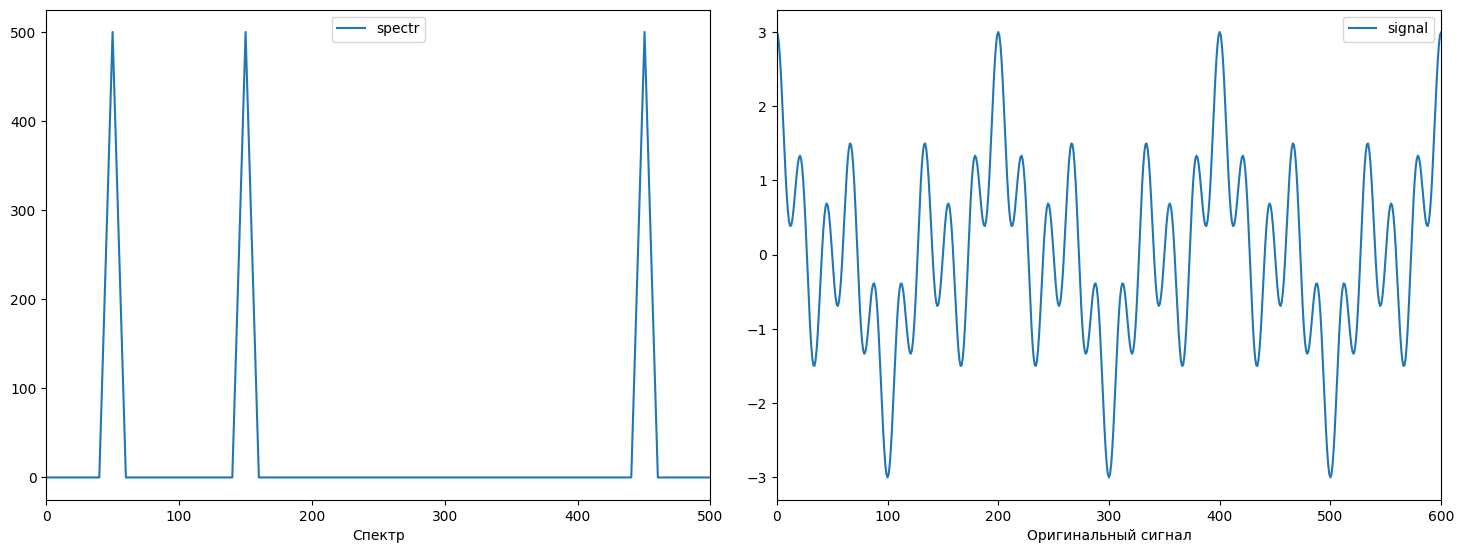

In [23]:
cos_50 = calculate_cos(50)
cos_150 = calculate_cos(150)
cos_450 = calculate_cos(450)

t_50, signal_50 = get_signal(cos_50, 0, 0.1, 0.0001)
t_150, signal_150 = get_signal(cos_150, 0, 0.1, 0.0001)
t_450, signal_450 = get_signal(cos_450, 0, 0.1, 0.0001)

cos_signal = signal_50 + signal_150 + signal_450

x = np.linspace(0, 10000, t_150.shape[0])

spectr = np.fft.fft(cos_signal)

fig = plt.figure(figsize=(18, 14))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

plt.subplot(221)
plt.plot(x, spectr, label='spectr')
plt.xlabel('Спектр')
plt.xlim([0,500])
plt.legend()

plt.subplot(222)
plt.xlabel('Оригинальный сигнал')
plt.plot(cos_signal, label="signal")
plt.xlim([0,600])
plt.legend()
plt.show()

![Alt text](image-7.png)

![Alt text](image-9.png)

![Alt text](image-10.png)

# ФНЧ

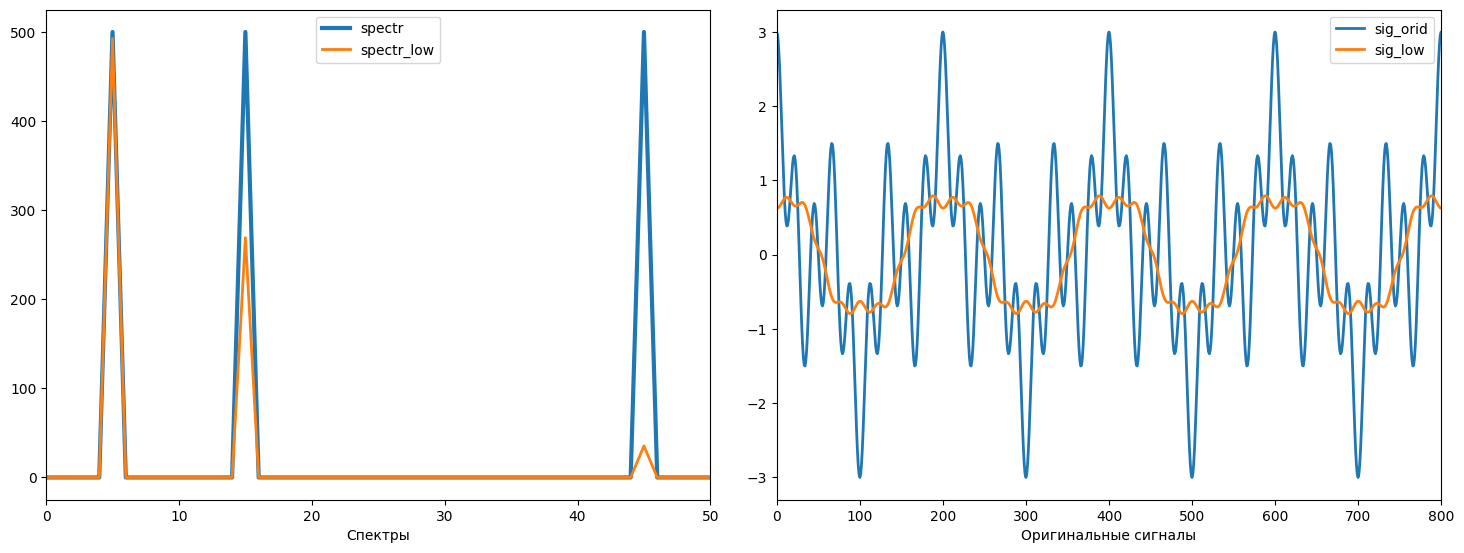

In [24]:
def get_bat_low(range_x, param_l, n):
    filter_low_bat = butterwort_low(range_x, param_l, n)
    filter_spectr = spectr[0:range_x.shape[0]]*filter_low_bat
    filtred_signal = np.fft.ifft(filter_spectr)
    return filter_spectr, filtred_signal

filter_spectr_low, filtred_signal_low = get_bat_low(x, 120, 2)

fig = plt.figure(figsize=(18, 14))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

plt.subplot(223)
spectr = np.fft.fft(cos_signal)
spectr_filter_low = np.fft.fft(cos_signal)
plt.plot(np.abs(spectr), label='spectr', linewidth=3)
plt.plot(np.abs(filter_spectr_low), label='spectr_low', linewidth=2)
plt.xlabel('Спектры')
plt.xlim([0,50])
plt.legend()

plt.subplot(224)
plt.xlabel('Оригинальные сигналы')
plt.plot(cos_signal, label="sig_orid", linewidth=2)
plt.plot(filtred_signal_low, label="sig_low", linewidth=2)
plt.xlim([0,800])
plt.legend()

plt.show()


# ФВЧ

![Alt text](image-11.png)

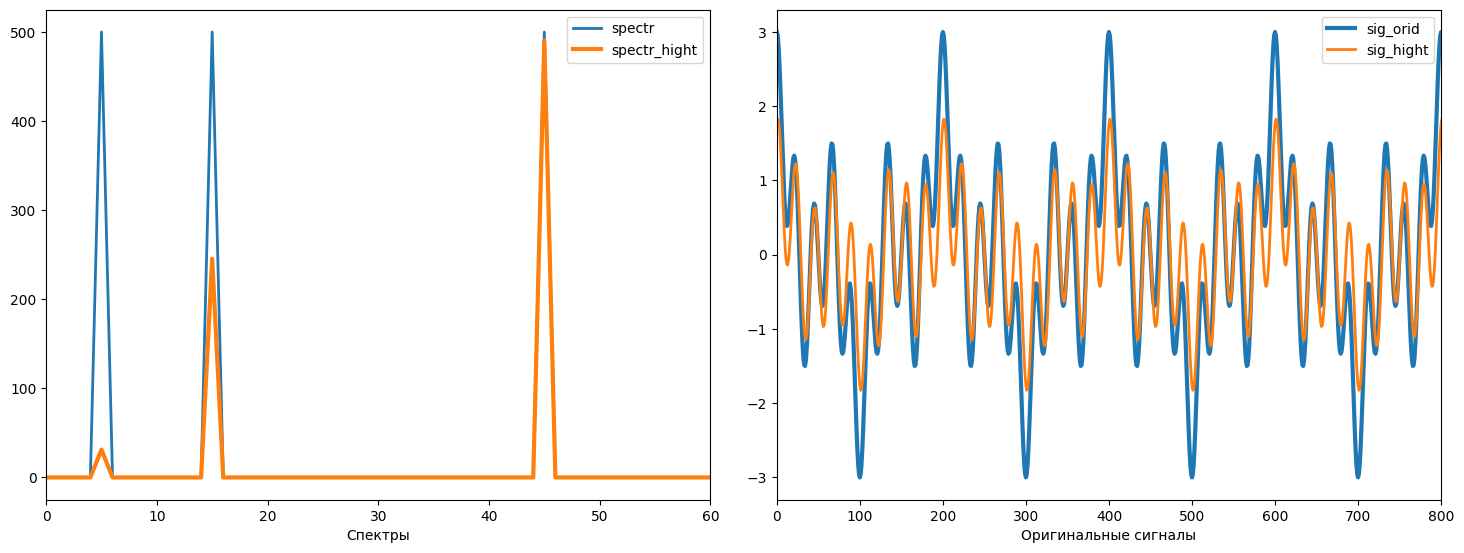

In [25]:
def get_bat_hight(range_x, param_h, n):
    filter_hight_bat = butterwort_high(range_x, param_h, n)
    filter_spectr = spectr[0:range_x.shape[0]]*filter_hight_bat
    filtred_signal = np.fft.ifft(filter_spectr)
    return filter_spectr, filtred_signal

filter_spectr_h, filtred_signal_h = get_bat_hight(x, 200, 2)

fig = plt.figure(figsize=(18, 14))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

plt.subplot(221)
spectr = np.fft.fft(cos_signal)
spectr_filter_low = np.fft.fft(cos_signal)
plt.plot(np.abs(spectr), label='spectr', linewidth=2)
plt.plot(np.abs(filter_spectr_h), label='spectr_hight', linewidth=3)
plt.xlabel('Спектры')
plt.xlim([0,60])
plt.legend()

plt.subplot(222)
plt.xlabel('Оригинальные сигналы')
plt.plot(cos_signal, label="sig_orid", linewidth=3)
plt.plot(filtred_signal_h, label="sig_hight", linewidth=2)
plt.xlim([0,800])
plt.legend()

plt.show()

# Полосный фильтр и Загружающий фильтр

![Alt text](image-13.png)

Полосный фильтр (Bandpass Filter):  Полосный фильтр позволяет пропускать только определенный диапазон частот входящего сигнала, блокируя частоты вне этого диапазона.

Заграждающий фильтр (Notch Filter или режекторный фильтр):  Заграждающий фильтр, наоборот, блокирует узкий диапазон частот входящего сигнала, пропуская остальные частоты.

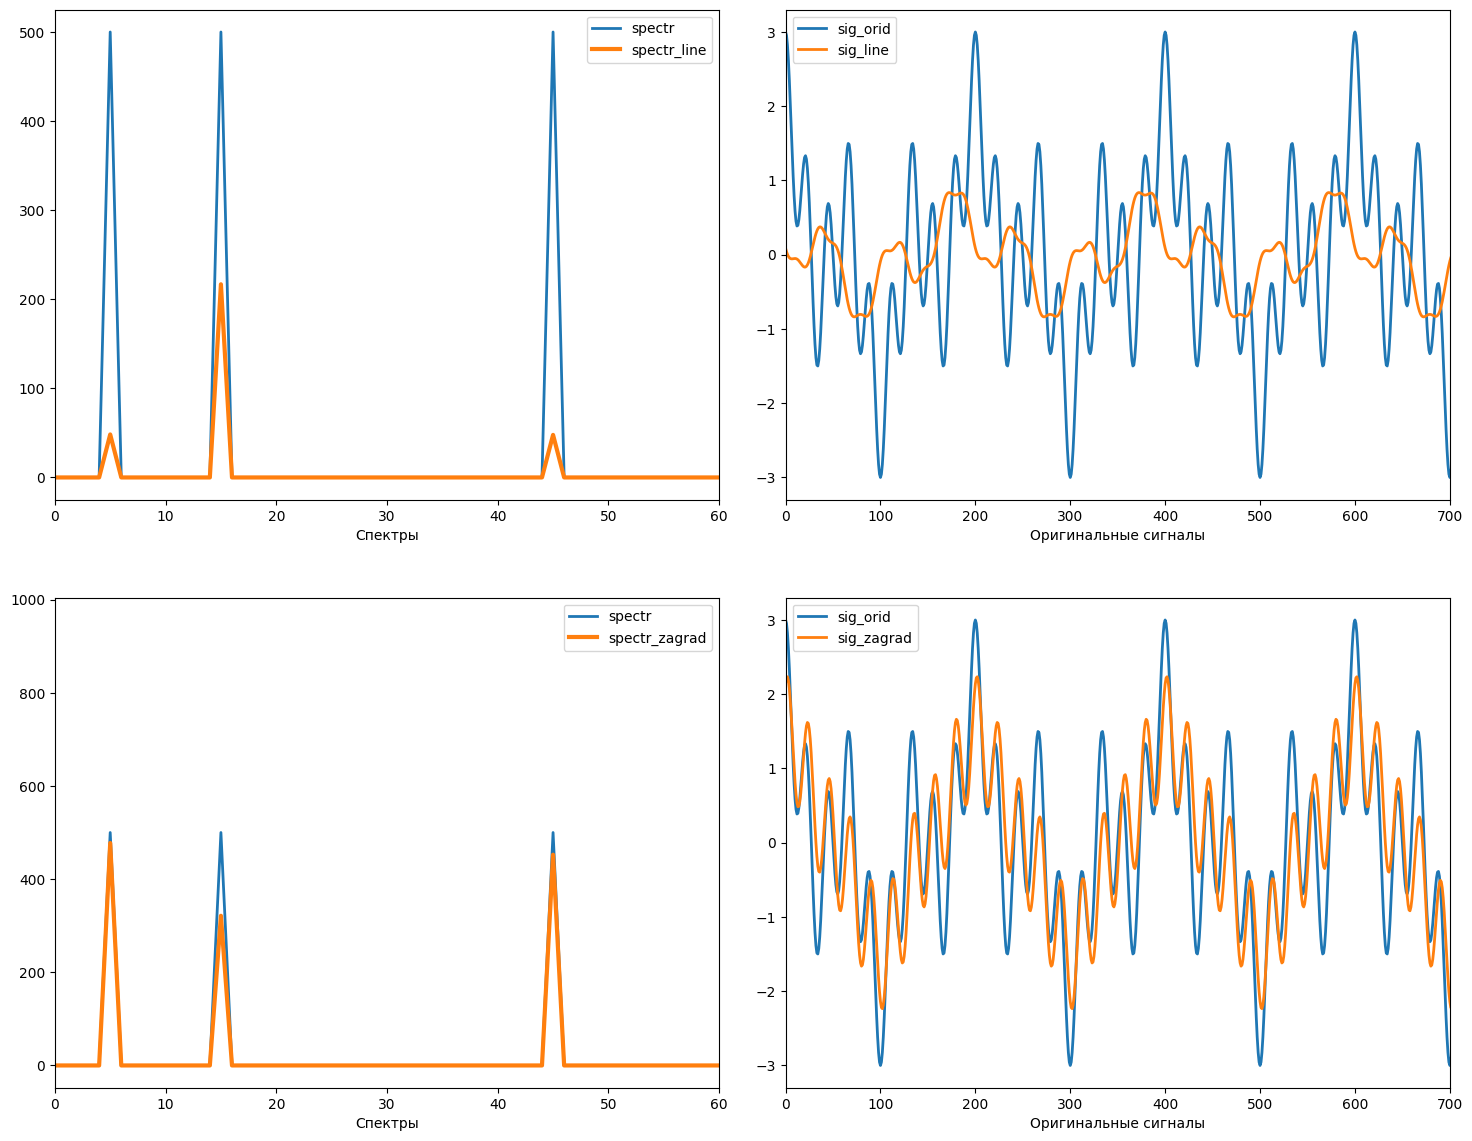

In [30]:
def get_bat_line(range_x, param_l, param_h, n):
    filter_hight_bat_h = butterwort_high(range_x, param_h, n)
    filter_hight_bat_l = butterwort_low(range_x, param_l, n)
    line_filter = filter_hight_bat_l * filter_hight_bat_h

    filter_spectr = spectr[0:range_x.shape[0]]*line_filter
    filtred_signal = np.fft.ifft(filter_spectr)
    return filter_spectr, filtred_signal

def get_bat_zagrad(range_x, param_l, param_h, n):
    filter_bat_h = butterwort_high(range_x, param_h, n)
    filter_bat_l = butterwort_low(range_x, param_l, n)
    zagrad_filter = filter_bat_h + filter_bat_l

    filter_spectr = spectr[0:range_x.shape[0]]*zagrad_filter
    filtred_signal = np.fft.ifft(filter_spectr)
    return filter_spectr, filtred_signal

filter_line_spectr, filter_line_signal = get_bat_line(x, 140, 160, 2)
filter_zagrad_spectr, filter_zagrad_signal = get_bat_zagrad(x, 100, 300, 2)

fig = plt.figure(figsize=(18, 14))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

plt.subplot(221)
spectr = np.fft.fft(cos_signal)
spectr_filter_low = np.fft.fft(cos_signal)
plt.plot(np.abs(spectr), label='spectr', linewidth=2)
plt.plot(np.abs(filter_line_spectr), label='spectr_line', linewidth=3)
plt.xlabel('Спектры')
plt.xlim([0,60])
plt.legend()

plt.subplot(222)
plt.xlabel('Оригинальные сигналы')
plt.plot(cos_signal, label="sig_orid", linewidth=2)
plt.plot(filter_line_signal, label="sig_line", linewidth=2)
plt.xlim([0,700])
plt.legend()

plt.subplot(223)
spectr = np.fft.fft(cos_signal)
spectr_filter_low = np.fft.fft(cos_signal)
plt.plot(np.abs(spectr), label='spectr', linewidth=2)
plt.plot(np.abs(filter_zagrad_spectr), label='spectr_zagrad', linewidth=3)
plt.xlabel('Спектры')
plt.xlim([0,60])
plt.legend()

plt.subplot(224)
plt.xlabel('Оригинальные сигналы')
plt.plot(cos_signal, label="sig_orid", linewidth=2)
plt.plot(filter_zagrad_signal, label="sig_zagrad", linewidth=2)
plt.xlim([0,700])
plt.legend()

plt.show()

![Alt text](image-14.png)

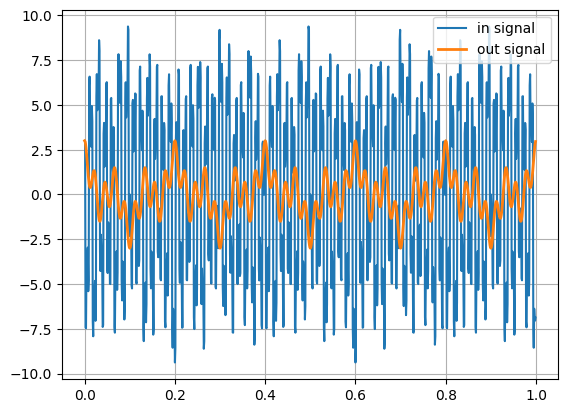

In [27]:
# Полюсы
poles = [np.cos(np.pi / 8) + 1j * np.sin(np.pi / 8),
         np.cos(3 * np.pi / 8) + 1j * np.sin(3 * np.pi / 8),
         np.cos(5 * np.pi / 8) + 1j * np.sin(5 * np.pi / 8),
         np.cos(7 * np.pi / 8) + 1j * np.sin(7 * np.pi / 8)]

# Создание передаточной функции
denominator = np.poly(poles)  # Преобразование полюсов в коэффициенты знаменателя

# Создание фильтра
butterworth_filter = signal.TransferFunction([1], denominator)

# Генерация входного сигнала
t = np.linspace(0, 1, 1000, False)
input_signal = cos_signal  # Пример входного сигнала с частотой 500 Гц

# Применение фильтра
output_signal = signal.lfilter(butterworth_filter.num, butterworth_filter.den, input_signal)

# Вывод результатов
import matplotlib.pyplot as plt

plt.figure()
plt.plot(t, output_signal, label='in signal')
plt.plot(t, input_signal, label='out signal', linewidth=2)
plt.legend()
plt.grid()
plt.show()

# Добавил шум

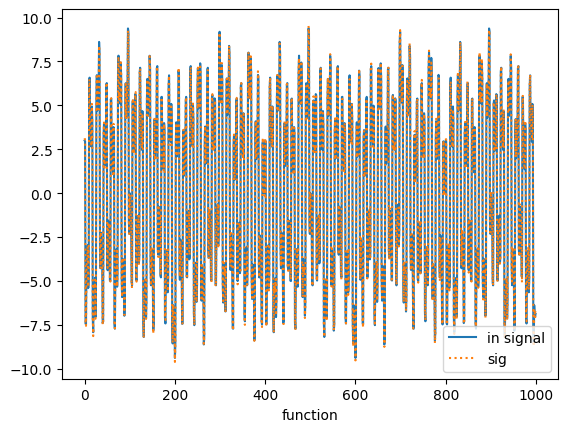

In [28]:
sig = output_signal + np.random.normal(0, 0.1, output_signal.shape)
plt.plot(output_signal, label='in signal')
plt.plot(sig, label='sig',  linestyle='dotted')
plt.xlabel('function')
plt.legend()